In [67]:
import sys
import os

# Add the project root directory to sys.path
project_root = os.path.abspath("..")  # Adjust this path if your notebook is in a different location
if project_root not in sys.path:
    sys.path.append(project_root)

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import importlib
import src.data_preprocessing as prp # Replace with the actual module name

# Reload the module to reflect the changes
importlib.reload(prp)

<module 'src.data_preprocessing' from 'd:\\work\\projects\\U of T\\CSC311\\final_project\\Credit-Risk-Prediction\\src\\data_preprocessing.py'>

#### Load the raw data

In [69]:
# Load the raw data
accepted_data, rejected_data = prp.load_data(processed=False)

d:\work\projects\U of T\CSC311\final_project\Credit-Risk-Prediction\src\data_preprocessing.py:14: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  accepted_data = pd.read_csv('..\data\\raw\\accepted\\accepted_2007_to_2018Q4.csv')


In [70]:
accepted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [71]:
rejected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Amount Requested      float64
 1   Application Date      object 
 2   Loan Title            object 
 3   Risk_Score            float64
 4   Debt-To-Income Ratio  object 
 5   Zip Code              object 
 6   State                 object 
 7   Employment Length     object 
 8   Policy Code           float64
dtypes: float64(3), object(6)
memory usage: 1.9+ GB


For now, we'll focus on the accepted loans

In [72]:
accepted_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [73]:
print(accepted_data.notnull().sum())

id                       2260701
member_id                      0
loan_amnt                2260668
funded_amnt              2260668
funded_amnt_inv          2260668
                          ...   
settlement_status          34246
settlement_date            34246
settlement_amount          34246
settlement_percentage      34246
settlement_term            34246
Length: 151, dtype: int64


In [74]:
accepted_data.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,580775.000000,2260668.0,1.207100e+05,120706.000000,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.350744e+06,1.394539e+06,1.191818e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.394320e+06,2.190392e+06,1.394539e+06,1.394538e+06,1.394538e+06,2.210638e+06,2.190322e+06,2.185733e+06,2.184597e+06,2.260523e+06,2.260639e+06,2.121597e+06,2.190391e+06,2.190391e+06,2.190392e+06,2.210638e+06,2.187256e+06,519701.000000,1.965233e+06,740359.000000,2.190392e+06,2.190392e+06,2.190392e+06,2.202078e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,7.025884e+02,5.768354e-01,3.454092e+01,72.312842,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.206891e+03,4.205965e+03,1.208256e+04,1.206439e+04,9.505772e+03,2.431388e+03,1.518453e+00,1.438791e+02,2.398257e+01,3.429346e+03,6.876610e+02,6.755397e+02,1.814580e-02,44.164220,1.0,1.236246e+05,19.251817,4.147942e-03,2.327317e+02,1.424922e+05,9.344199e-01,2.779407e+00,6.764314e-01,1.562752e+00,2.122236e+01,3.550665e+04,6.914098e+01,1.290133e+00,2.749923e+00,5.806393e+03,5.703230e+01,3.457394e+04,1.012867e+00,1.47

In [75]:
# Check for number of observations in each class

accepted_data.loan_status.value_counts()

loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64

Remove the "in grace period" and  class <br>
Put all the late and default in "charged off" <br>

In [76]:
import hvplot.pandas

accepted_data['loan_status'].value_counts().hvplot.bar(
    title="Loan Status Counts", xlabel='Loan Status', ylabel='Count', 
    width=500, height=350
)

:Bars   [loan_status]   (count)

For the next step, we will remove the cheat columns, which are columns that are not available before the loans are given <br>
Only include the information given before the loan was given

In [98]:
drop_list = ['acc_now_delinq', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'disbursement_method', 'funded_amnt', 'funded_amnt_inv', 'hardship_flag', 'inq_last_6mths', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_amnt', 'last_pymnt_d', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',  'out_prncp', 'out_prncp_inv', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pymnt_plan', 'recoveries', 'tax_liens', 'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'total_rev_hi_lim', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

cleaned_accepted_data = prp.drop_cheat_features(accepted_data, drop_list)

TypeError: drop_cheat_features() takes 1 positional argument but 2 were given

We will drop the features with the following criteria:

- More than 50% of the data is missing
- The feature would not have been available at the time of the loan application ("issue_d").
- We will also address the following:

convert strings to numerical values
- drop superfluous attributes
- highly correlated predictors
- zero (or nearly zero) variance predictors

Drop features missing too much data

In [91]:
cleaned_accepted_data = prp.drop_missing_features(cleaned_accepted_data, threshold=0.40)

Your selected dataframe has 79 columns.
There are 78 columns that have missing values.
There are 44 columns to be dropped.


In [92]:
cleaned_accepted_data.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,policy_code,application_type,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,pub_rec_bankruptcies
0,68407277,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,Aug-2003,675.0,679.0,7.0,0.0,2765.0,29.7,13.0,w,1.0,Individual,148.0,128.0,1.0,0.0
1,68355089,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,Dec-1999,715.0,719.0,22.0,0.0,21470.0,19.2,38.0,w,1.0,Individual,113.0,192.0,4.0,0.0
2,68341763,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,NaN,605xx,IL,10.78,Aug-2000,695.0,699.0,6.0,0.0,7869.0,56.2,18.0,w,1.0,Joint App,125.0,184.0,5.0,0.0
3,66310712,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,076xx,NJ,17.06,Sep-2008,785.0,789.0,13.0,0.0,7802.0,11.6,17.0,w,1.0,Individual,36.0,87.0,1.0,0.0
4,68476807,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,Major purchase,174xx,PA,25.37,Jun-1998,695.0,699.0,12.0,0.0,21929.0,64.5,35.0,w,1.0,Individual,128.0,210.0,6.0,0.0


In [93]:
cleaned_accepted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 35 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    object 
 1   loan_amnt             float64
 2   term                  object 
 3   int_rate              float64
 4   installment           float64
 5   grade                 object 
 6   sub_grade             object 
 7   emp_title             object 
 8   emp_length            object 
 9   home_ownership        object 
 10  annual_inc            float64
 11  verification_status   object 
 12  issue_d               object 
 13  loan_status           object 
 14  url                   object 
 15  purpose               object 
 16  title                 object 
 17  zip_code              object 
 18  addr_state            object 
 19  dti                   float64
 20  earliest_cr_line      object 
 21  fico_range_low        float64
 22  fico_range_high       float64
 23  open_ac

There are now 35 columns. 


In [94]:
cleaned_accepted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 35 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    object 
 1   loan_amnt             float64
 2   term                  object 
 3   int_rate              float64
 4   installment           float64
 5   grade                 object 
 6   sub_grade             object 
 7   emp_title             object 
 8   emp_length            object 
 9   home_ownership        object 
 10  annual_inc            float64
 11  verification_status   object 
 12  issue_d               object 
 13  loan_status           object 
 14  url                   object 
 15  purpose               object 
 16  title                 object 
 17  zip_code              object 
 18  addr_state            object 
 19  dti                   float64
 20  earliest_cr_line      object 
 21  fico_range_low        float64
 22  fico_range_high       float64
 23  open_ac

In [95]:
cleaned_accepted_data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,policy_code,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,pub_rec_bankruptcies
count,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260668e+06,2.260668e+06,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2260668.0,2.121597e+06,2.190391e+06,2.210638e+06,2.259303e+06
mean,1.504693e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,6.985882e+02,7.025884e+02,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,1.0,1.257378e+02,1.814916e+02,1.555382e+00,1.281935e-01
std,9.190245e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,3.301038e+01,3.301124e+01,5.640861e+00,5.705150e-01,2.294831e+04,2.471307e+01,1.198753e+01,0.0,5.338218e+01,9.711845e+01,1.904981e+00,3.646130e-01
min,5.000000e+02,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,6.100000e+02,6.140000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.0,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,6.750000e+02,6.790000e+02,8.000000e+00,0.000000e+00,5.950000e+03,3.150000e+01,1.500000e+01,1.0,9.600000e+01,1.160000e+02,0.000000e+00,0.000000e+00
50%,1.290000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,6.900000e+02,6.940000e+02,1.100000e+01,0.000000e+00,1.132400e+04,5.030000e+01,2.200000e+01,1.0,1.300000e+02,1.640000e+02,1.000000e+00,0.000000e+00
75%,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,7.150000e+02,7.190000e+02,1.400000e+01,0.000000e+00,2.024600e+04,6.940000e+01,3.100000e+01,1.0,1.540000e+02,2.320000e+02,3.000000e+00,0.000000e+00
max,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,8.450000e+02,8.500000e+02,1.010000e+02,8.600000e+01,2.904836e+06,8.923000e+02,1.760000e+02,1.0,9.990000e+02,9.990000e+02,9.400000e+01,1.200000e+01


In [96]:
# Set Pandas to display all columns
pd.set_option('display.max_columns', None)

cleaned_accepted_data.sample(5)

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,policy_code,application_type,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,pub_rec_bankruptcies
1949769,90305158,35000.0,60 months,18.99,907.73,D,D3,Manager,10+ years,MORTGAGE,150000.0,Source Verified,Sep-2016,Current,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,140xx,NY,15.77,Mar-1984,690.0,694.0,9.0,0.0,53832.0,70.0,18.0,w,1.0,Individual,160.0,390.0,2.0,0.0
1725606,96668106,33000.0,60 months,14.99,784.90,C,C4,UX Designer,< 1 year,MORTGAGE,75000.0,Verified,Jan-2017,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,346xx,FL,16.11,Jan-1999,670.0,674.0,9.0,0.0,14023.0,51.7,12.0,w,1.0,Individual,112.0,216.0,1.0,0.0
594772,115420599,15000.0,60 months,12.62,338.39,C,C1,RN charge,4 years,MORTGAGE,50000.0,Not Verified,Aug-2017,Current,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,363xx,AL,21.70,Sep-2004,735.0,739.0,8.0,0.0,9301.0,44.3,14.0,w,1.0,Individual,155.0,145.0,2.0,0.0
1850382,3627632,18000.0,60 months,16.29,440.51,C,C4,Danville District 118,9 years,MORTGAGE,71000.0,Verified,May-2013,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Reduction,618xx,IL,16.29,Mar-1993,680.0,684.0,18.0,0.0,16067.0,49.7,44.0,f,1.0,Individual,125.0,244.0,3.0,0.0
333574,43925442,7975.0,36 months,17.57,286.60,D,D4,Controller,3 years,OWN,59968.0,Source Verified,Apr-2015,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,298xx,SC,19.23,Oct-2005,670.0,674.0,15.0,5.0,7549.0,44.4,25.0,f,1.0,Individual,63.0,113.0,0.0,1.0


In [100]:
cleaned_accepted_data.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,earliest_cr_line,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,policy_code,application_type,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mort_acc,pub_rec_bankruptcies
0,68407277,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,Aug-2003,675.0,679.0,7.0,0.0,2765.0,29.7,13.0,w,1.0,Individual,148.0,128.0,1.0,0.0
1,68355089,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,Dec-1999,715.0,719.0,22.0,0.0,21470.0,19.2,38.0,w,1.0,Individual,113.0,192.0,4.0,0.0
2,68341763,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,NaN,605xx,IL,10.78,Aug-2000,695.0,699.0,6.0,0.0,7869.0,56.2,18.0,w,1.0,Joint App,125.0,184.0,5.0,0.0
3,66310712,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,076xx,NJ,17.06,Sep-2008,785.0,789.0,13.0,0.0,7802.0,11.6,17.0,w,1.0,Individual,36.0,87.0,1.0,0.0
4,68476807,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,Major purchase,174xx,PA,25.37,Jun-1998,695.0,699.0,12.0,0.0,21929.0,64.5,35.0,w,1.0,Individual,128.0,210.0,6.0,0.0


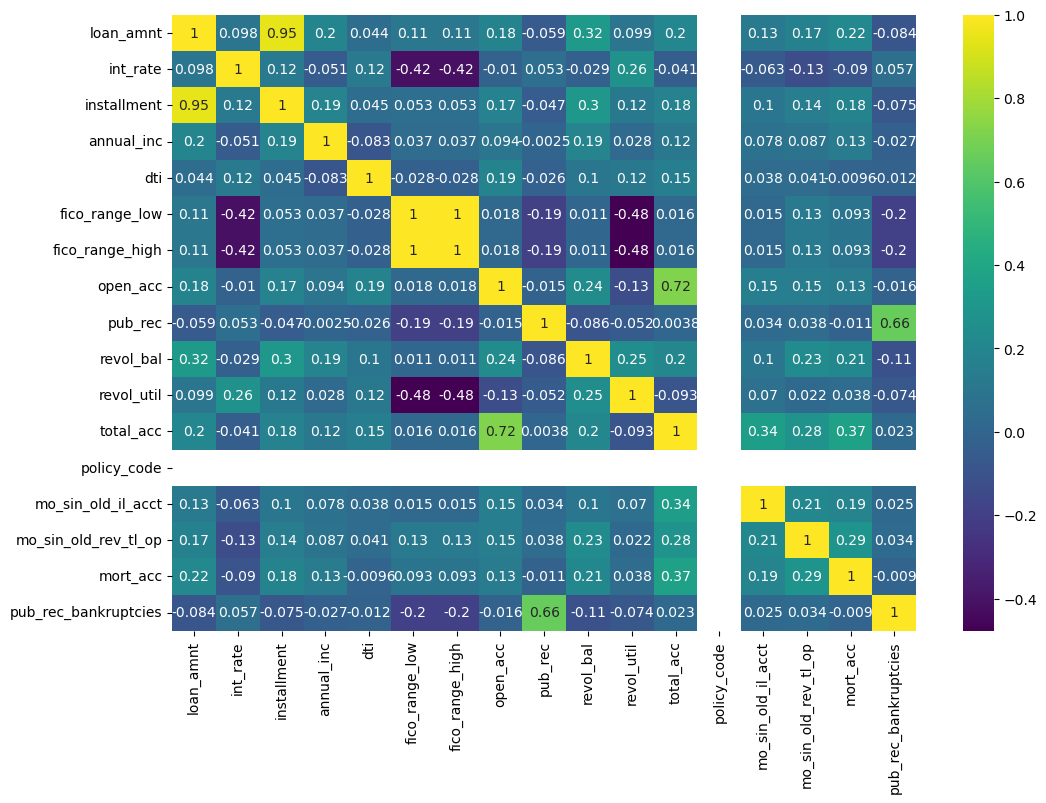

In [97]:
# plot the correlation matrix to identify highly correlated features

prp.plot_corr_matrix(cleaned_accepted_data)

Let's drop:
- policy code: since it's the same for all obesrvations.
- id: is not relevant for prediction
- title: is not relevant for prediction
- emp_title: is not relevant for prediction
- installment : it's highly correlated with loan_amnt (0.95)
- fico_range_low: it's highly correlated with fico_range_high (1.0)
- open_acc: it's highly correlated with total_acc (0.72)
- pub_rec_bankruptcy: it's highly correlated with pub_rec (0.66)
- sub_grade: is not relevant for prediction
- zip_code: is not relevant for prediction

In [101]:
drop_list = ["id", "policy_code", "title", "emp_title", "installment", "fico_range_low", "open_acc", "pub_rec_bankruptcies", "sub_grade", "zip_code"]
cleaned_accepted_data = prp.drop_features(cleaned_accepted_data, drop_list)

In [103]:
cleaned_accepted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 25 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             float64
 1   term                  object 
 2   int_rate              float64
 3   grade                 object 
 4   emp_length            object 
 5   home_ownership        object 
 6   annual_inc            float64
 7   verification_status   object 
 8   issue_d               object 
 9   loan_status           object 
 10  url                   object 
 11  purpose               object 
 12  addr_state            object 
 13  dti                   float64
 14  earliest_cr_line      object 
 15  fico_range_high       float64
 16  pub_rec               float64
 17  revol_bal             float64
 18  revol_util            float64
 19  total_acc             float64
 20  initial_list_status   object 
 21  application_type      object 
 22  mo_sin_old_il_acct    float64
 23  mo_sin_

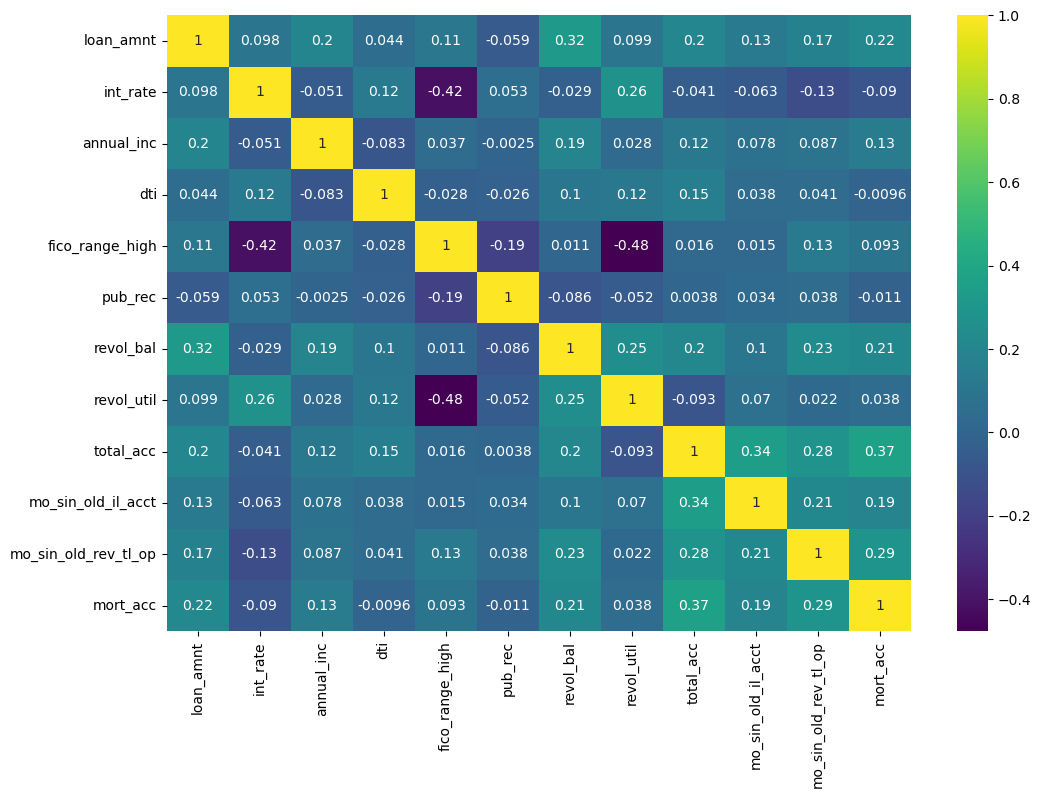

In [102]:
# plot the correlation matrix to identify highly correlated features

prp.plot_corr_matrix(cleaned_accepted_data)

Let's save our preprocessed accepted loan data

In [ ]:
# Ensure the directory exists
output_dir = '../data/processed/'
os.makedirs(output_dir, exist_ok=True)

# Save the cleaned data to a CSV file
cleaned_accepted_data.to_csv(f'{output_dir}/preprocessed_accepted.csv', index=False)

In [1]:
cleaned_accepted_data.head()

NameError: name 'cleaned_accepted_data' is not defined